# Final Project

You have made it to the end of the course, and you have worked hard to develop your DSA perspectives and skills.  So far we have been internally focused on the operations of performing data science and analytics.  Now we will extend our work to the development of a data story that is externally focused.

In the Module8 labs, you saw simplified examples of constructing data stories. In module4 (Database) there also was an abbreviated example data story.  Throughout the course, there are components and parts useful to consider as a basis for developing a short, unique, focused data story.


For this final project, you will 

- Step 0: Choose your Language for this Adventure

- Step 1: Find a Story

- Step 2: Remember your Audience

- Step 3: Find and Stage Your Data

- Step 4: Vet Data Sources

- Step 5: Filter Results and Build/Validate Models

- Step 6: Visualize Results

- Step 7: Communicate the Story to your intended audience using visualizations and narratives

- Final Step: Connect your workflow/process to the DSA-Project Life Cycle

---
Here are some recommendations for managing the scope and quality of this project:

- Narrow down the issue, problem, question, or hypothesis for you data story to a single, relatively simple perspective.

- Identify already available data that affords addressing your problem.  If using completely new data, know it well.

- Address the data relative to the statistical/machine learning model(s) chosen to minimize any issues.

- Internally document your code using comments that explain the purpose of the operation(s).


Make your project unique by

- Comparing two or more different statistical/machine learning models using the same data.
- Refrain from identically replicating any existing projects obtained from external sources.
- Running a single model multiple times and changing a different single parameter each time for comparison.
- Changing the sampling proportions for building the hold-out data and comparing the same model performance repeatedly.
- Select something you find interesting or unique in the data and write a story around it.




## Step 0: Choose your Language for this Adventure:

You can do this project in either *R* or *Python*.

To change the kernel of this notebook, do the following with the `Kernel` menu.

 * `Kernel > Change Kernel > Python 3`
 * `Kernel > Change Kernel > R`

![FP_Change_Kernel.png MISSING](../images/FP_Change_Kernel.png)


---
## Step 1: Find a Story

Think back to any of the data files we have used in this class. 
Alternatively, you can search online for potential data and story ideas.

In the cell below, please detail the source of your data (with link).
Additionally, preview your story you hope to uncover.

## Step 2: Remember your Audience

In the cell below, describe your audience!
 * Who will the audience be?
 * What value will they derive from your story?

## Step 3: Find and Stage Your Data

If you data is from another source, such as Kaggle, you must download it to your local computer, then upload the data to JuptyerHub.

#### If you are uploading files:
 * Use folder navigation of your first JupyterTab to get to course's `/modules/module8/exercises/` folder.
![FP_Folder_Navigation.png MISSING](../images/FP_Folder_Navigation.png)
 * Click the Upload Button and Choose File(s)
![FP_Upload_Button.png MISSING](../images/FP_Upload_Button.png)
 * Activate the upload
![FP_UploadFile_2.png MISSING](../images/FP_UploadFile_2.png)
 

### In the cell below, please list the name(s) of the file(s) that is now accessible on the JupyterHub environment.

**Note**: 
If you uploaded a file to your `module8/exercises` folder, the file name is all you need to load it into the a data frame in the usual manner.
If you are using a file from another module of the course, you should be able to copy the full pathname and use it as is in this notebook.

## Step 4: Vet Data Sources

Use the cells below to load the data, inspect it, conduct data carpentry and shaping; perform exploratory data analysis.  

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

Reading the data

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Checking number of "NA" values present in each columns.

In [5]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())



Filling mean value in each cell contaning "NA" values so that the model performs better.

In [6]:
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

Filling mode value in all columns contaning categorical data.

In [7]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


Adding the "ApplicantIncome" and "CoapplicantIncome" and storing the results in a new column that is "Total Income". 

This is done in order to reduce the amount of data and the income of applicant and co applicant will be considered as a whole while checking the financial status of the candidate.

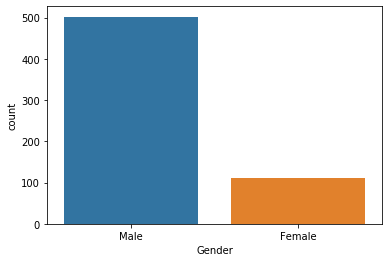

In [78]:
sns.countplot(df['Gender'])
#plotting the categorical data in order to know the status of the applicants

The plot shows that males are majority in number among the applicants.

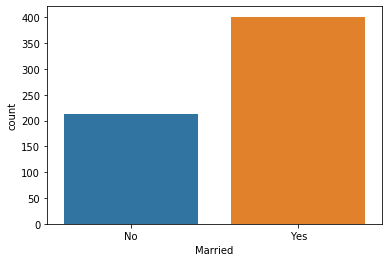

In [79]:
sns.countplot(df['Married'])

The plot shows that most of the applicants are married and not single.

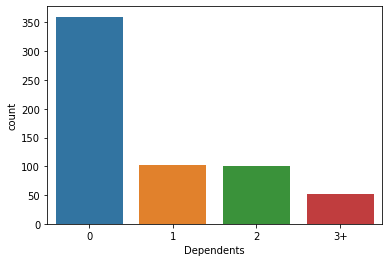

In [80]:
sns.countplot(df['Dependents'])

Majority of the applicants have "0" dependents with few of them having "1" or "2" and more than "3".

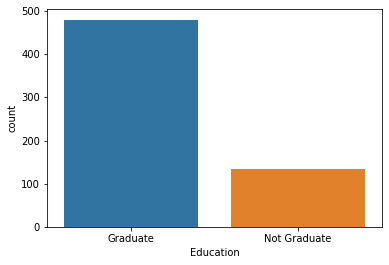

In [81]:
sns.countplot(df['Education'])

Almost all of the applicants are well educated which implies to the possibility of higher employment rates.

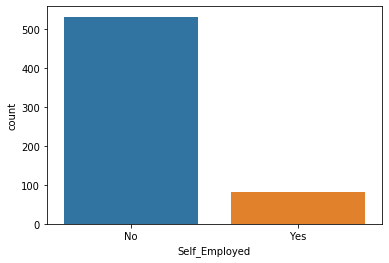

In [82]:
sns.countplot(df['Self_Employed'])

From the previous graph this is the expected result, most of the candidates are not self employed i.e they are working.

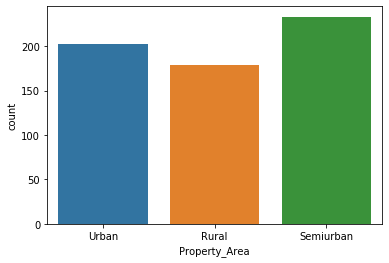

In [83]:
sns.countplot(df['Property_Area'])

This plot describes the region of the applicants who are largly located in semiurban areas.

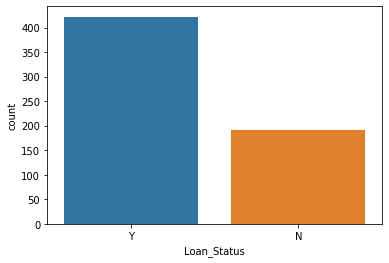

In [84]:
sns.countplot(df['Loan_Status'])

This plot is a happy one for the applicants since the approved percentage is higher than the rejected percentage.

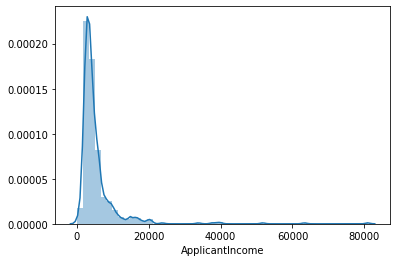

In [85]:
sns.distplot(df["ApplicantIncome"])

When the numerical data is plotted, the graph is left side skewed. The same issues with the other numerical data plots, in order to avoid these issues, the numerical data is convereted into log values so that the attributes produce a bell curve and not a skewed curve towards one side.

In [105]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
df['Total_income_Log'] = np.log(df['Total_Income']+1)


Applying log transformations to each and every column that contains numerical data in order to normalize the data.

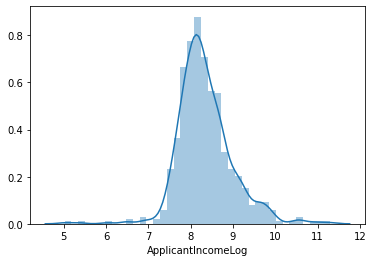

In [90]:
sns.distplot(df["ApplicantIncomeLog"])

The changes can be seen as the plot is a bell curve after changing the values to log.

In [106]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


All the attributes which do not contribute towards the dataset are dropped.

## Step 5: Filter Results and Build/Validate Models


Perform any additional data carpentry and begin filtering results/data and then build, validate, and describe your model(s). 

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [107]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

encoding the labels of the dataset

In [108]:
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

Choosing the columns that are needed for train test split


In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Splitting the dataset into training and testing datasets.

In [110]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

Implementing the model

In [111]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.79587519830778


Logistic Regression

In [112]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 70.77922077922078
Cross validation is 70.05552617662613


Decision tree classifier

The cross validation score is the base on which both the models are being judged. Lesser the cross validation value better the performance of the model. In this case, the decision tree classifier performs better than the logistic regression because the descision tree contains many nodes which divide the data into smaller and smaller segments. Decision tree follows the divide and Conquer method. When the data is divided into smaller region, there is good chance that it performs better, whereas the logistic regression on the other hand is a simple line which divides the data into exactly two regions inturn decreasing the performance of the model.

## Step 6: Visualize Results

Build up your key visual story elements!

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

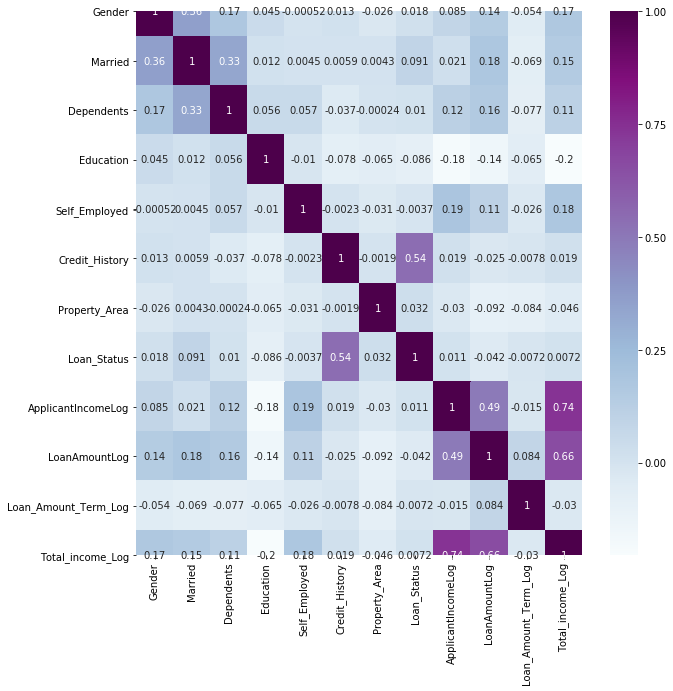

In [115]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True , cmap= "BuPu")




High density is plotted with darker colors and the less density is plotted with lighter color. This matrix is useful in order to determine the important values that need to be kept and the ones that need to be dropped.

## Step 7: Communicate the Story to your intended audience using visualizations and narrative


In a few paragraphs, describe the story the data tells. 

Additionally, post your most compelling visual and provide a brief description of what it conveys on to our mutual aid channel (the slack course channel). 

Feel free to post more examples for people to look at and provide feedback. Your classmates will be vital providers of feedback in this process. Utilize them.

# Final Step: Connect your workflow/process to the DSA-Project Life Cycle
- List and briefly discuss how important details from each stage of the [DSA-PLC](../../module1/resources/DSA-ProjectLifecycle-slidedeck.pdf) played a role in your story development.
- Use markdown to provide this overview below:
<hr/>

<h1 align="center"><u>DSA-Project Life Cycle Discussion</u></h1>




 
 While working on the project , in each and every phase of it I was remined of the "Project Life cycle". Rather than other modules where I had to write the code for the given questions, this time everything was to be done from scratch so it took time doing each and every step of the project. 
 
 Listed below are the learnings from each stage of the dsa project life cycle.
 
 1. Project Defining and requirement :
     The first step of any project related to data will be to view the dataset and understanding what the client or the user expects and to fullfill the requirements completely. Understanding the requirement of the client is extremely important since each and every step we take towards building the model will be according to those requirements only .
     
     
  2. Data Aquisition : After knowing the requirements of the clients, the dataset needs to be viewed and understood. This phase in this project was understanding all the attributes and the size of data, determining which columns are necessary and which are not. Based on the notes in this phase the data carpentry can be done swiftly.
  
  
  3. Data Shaping and carpentry : The data carpentry phase was a fun and enjoyable one for me. I used the notes from the second step and quickly removed all the unecessary columns and checked the number of missing values present in the each attribute. There are many methods to handle the missing values but I chose to fill the mean and mode for all the missing data.
  
  
  4. Exoloratory data analysis : The first step that I did in the exploratory data analysis is to visualize all the attributes that contain categorical data. This analysis showed that most of the candidates are "male" and "married". Most of the candidates don't have dependents. The analysis also showed that majority of the candidates are working and not self employed. The region also provided insights on the region of the applicants. Finally with analysis of the loan status the conclusion is that most of the loan were approved which is a good sign. 
  
  While analysing the numerical data starting with applicant income, most of the applicants were earning less than 10,000 and few more than that. The graph was left skewed and not a bell curve. With these values the model did not perform better as needed so I looked up and found out that in such cases normalizing the data is the key to attain better results. So I changed all the numerical values to log values which in turn improved the performance of the model.
  
  
 5. Machine Learning model Building: Since the problem is prediction, I have choosen "Logistic Regression" and "Decision Tree". By this part of the project most of the hard work and the complicated things were done, the model was imported from sklearn and the training, testing data sets were split. The model is first trained with the training data and then it is set to predict using the testing dataset.
 
 
 6. Model Validation : Unlike the previous modules the model is validated using CV score. The CV score is also called as cross validation score, majority of the articles pointed towards using of CV score rather than other assesing tools.
 
 
 7. Data Story : This phase is the one that has really interested me. Previously the projects that I have worked in the data carpentry and EDA was the one given more importance but telling the story with data is completely new to me. 
 
 
 8. Model deployment. The deployment phase is one for the more of real time projects not for the small datasets like these. Those real time projects contain actual audiences with real expectations.
 




























# Save your notebook, then `File > Close and Halt`